In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns   
import numpy as np

In [3]:
df = pd.read_csv("DS1_C5_S5_Hotel Dataset.csv")


In [4]:
# DATA CLEANING

df.drop_duplicates(inplace=True)

df.fillna({"agent": df["agent"].mean().round(2),"company": df["company"].mean().round(2)}, inplace=True)

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
num_df = df[num_cols]


cat_cols = df.select_dtypes(include=['object', 'category']).columns
cat_df = df[cat_cols]

print("Numerical Columns:\n", num_df.columns, "\n")
print("Categorical Columns:\n", cat_df.columns, "\n")

Numerical Columns:
 Index(['is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company',
       'days_in_waiting_list', 'adr', 'required_car_parking_spaces',
       'total_of_special_requests'],
      dtype='object') 

Categorical Columns:
 Index(['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment',
       'distribution_channel', 'reserved_room_type', 'assigned_room_type',
       'deposit_type', 'customer_type', 'reservation_status',
       'reservation_status_date'],
      dtype='object') 



In [5]:
pd.set_option('display.max_columns', None)

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,222.22,0,Transient,97.00,0,3,Check-Out,05-07-2015
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,A,C,0,No Deposit,242.0,222.22,0,Transient,98.00,0,1,Check-Out,04-07-2015
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,2,0,BB,USA,Online TA,TA/TO,0,0,0,G,H,0,No Deposit,240.0,222.22,0,Transient,153.00,1,0,Check-Out,05-07-2015
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,241.0,222.22,0,Transient,94.71,0,0,Check-Out,04-07-2015
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,241.0,222.22,0,Transient,117.81,1,2,Check-Out,10-07-2015


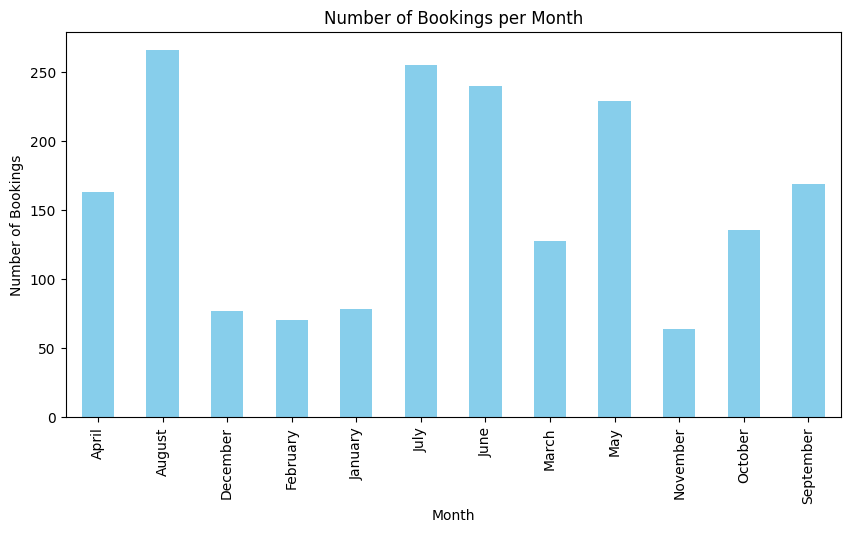

Correlation between Lead Time and Cancellation: 0.17


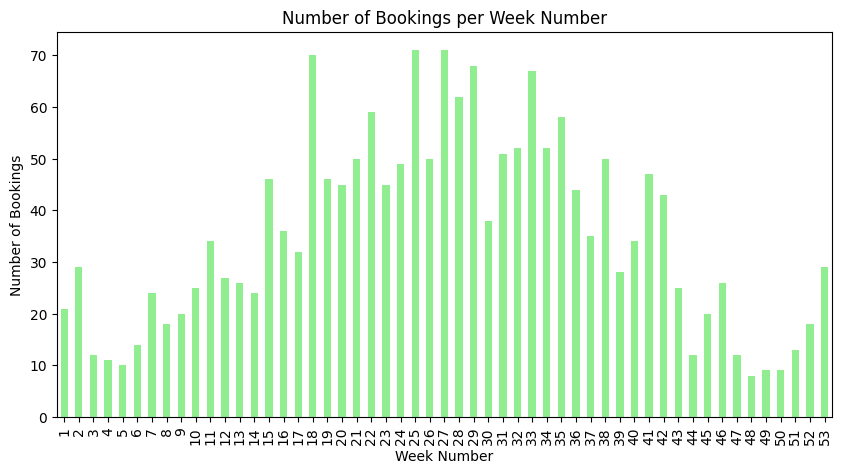

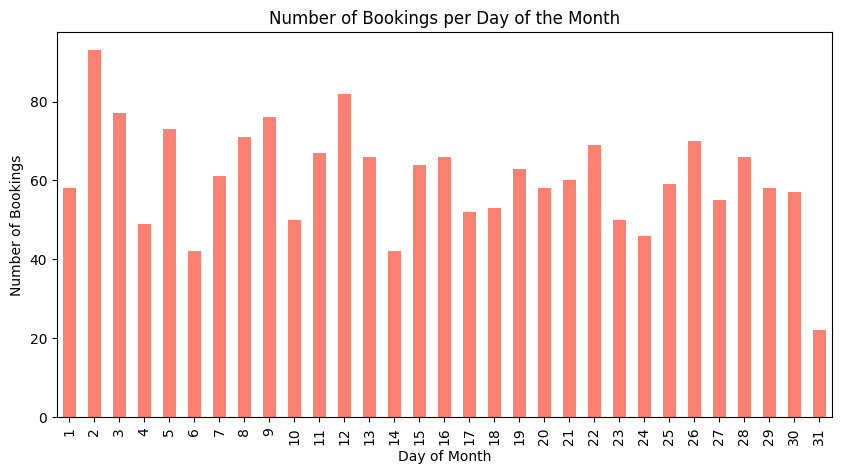

In [6]:
# BOOKING PATTERN ANALYSIS

# 1️⃣ Number of bookings per month
plt.figure(figsize=(10,5))
df["arrival_date_month"].value_counts().sort_index().plot(kind="bar", color="skyblue")
plt.title("Number of Bookings per Month")
plt.xlabel("Month")
plt.ylabel("Number of Bookings")
plt.show()

# 2️⃣ Correlation between lead_time and cancellation
lead_corr = df["lead_time"].corr(df["is_canceled"]).round(2)
print(f"Correlation between Lead Time and Cancellation: {lead_corr}")

# 3️⃣ Number of bookings per week number
plt.figure(figsize=(10,5))
df["arrival_date_week_number"].value_counts().sort_index().plot(kind="bar", color="lightgreen")
plt.title("Number of Bookings per Week Number")
plt.xlabel("Week Number")
plt.ylabel("Number of Bookings")
plt.show()

# 4️⃣ Number of bookings per day of the month
plt.figure(figsize=(10,5))
df["arrival_date_day_of_month"].value_counts().sort_index().plot(kind="bar", color="salmon")
plt.title("Number of Bookings per Day of the Month")
plt.xlabel("Day of Month")
plt.ylabel("Number of Bookings")
plt.show()

# 📊 INTERPRETATION – BOOKING PATTERN ANALYSIS
#
# 1️⃣ Number of Bookings per Month
# - Some months show higher booking activity (likely peak travel seasons such as summer or holidays).
# - Months with fewer bookings indicate off-peak demand, where promotions and discounts may help attract guests.
#
# 2️⃣ Correlation between Lead Time and Cancellation
# - A positive correlation suggests that longer lead times are associated with higher cancellation rates.
# - Guests booking far in advance are more uncertain about their plans, leading to more cancellations.
#
# 3️⃣ Number of Bookings per Week Number
# - Certain weeks of the year show spikes, possibly due to festivals, holidays, or seasonal trends.
# - Weeks with consistently low bookings can be targeted with special offers to increase occupancy.
#
# 4️⃣ Number of Bookings per Day of the Month
# - Booking activity varies across different days of the month.
# - End-of-month peaks may align with salary cycles or holiday planning.
# - Steady days indicate stable demand, while sharp spikes may relate to events or promotions.


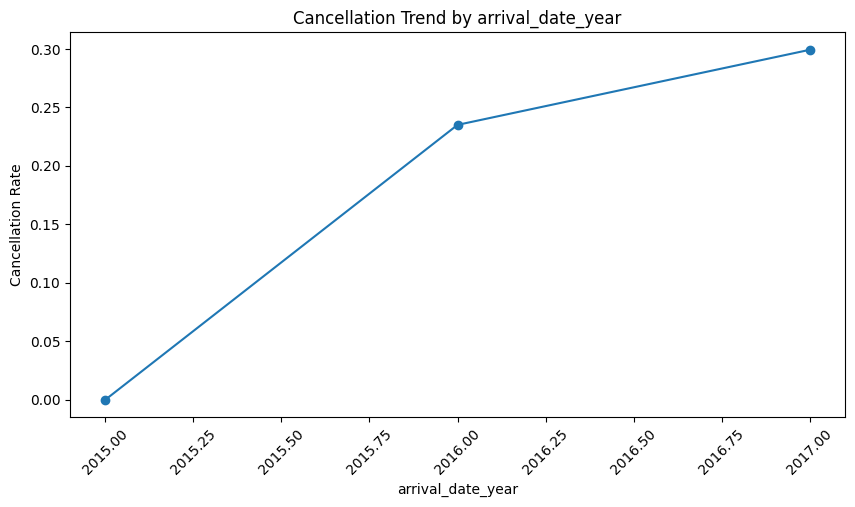

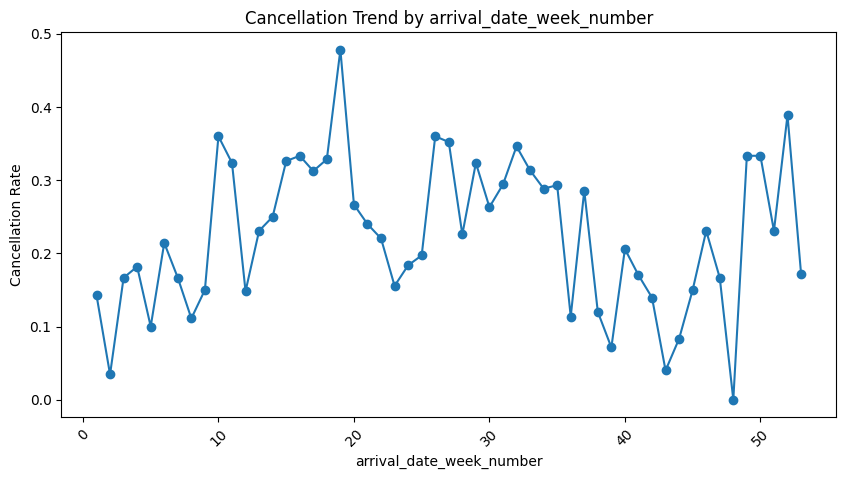

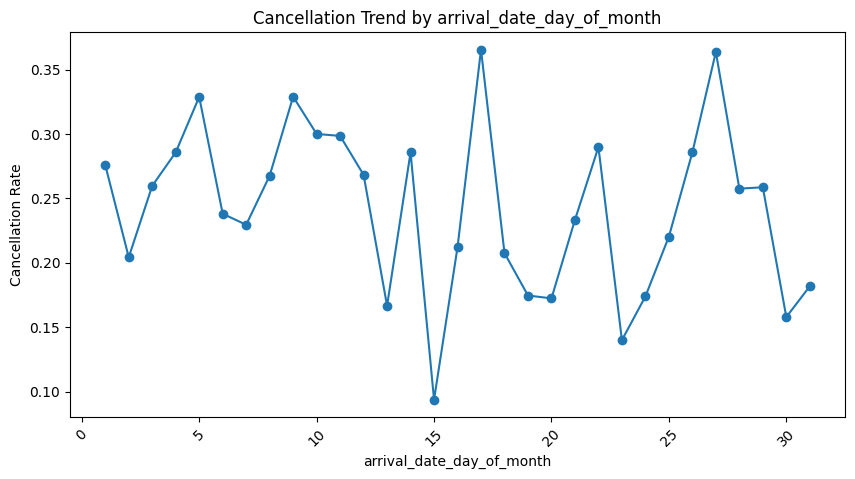

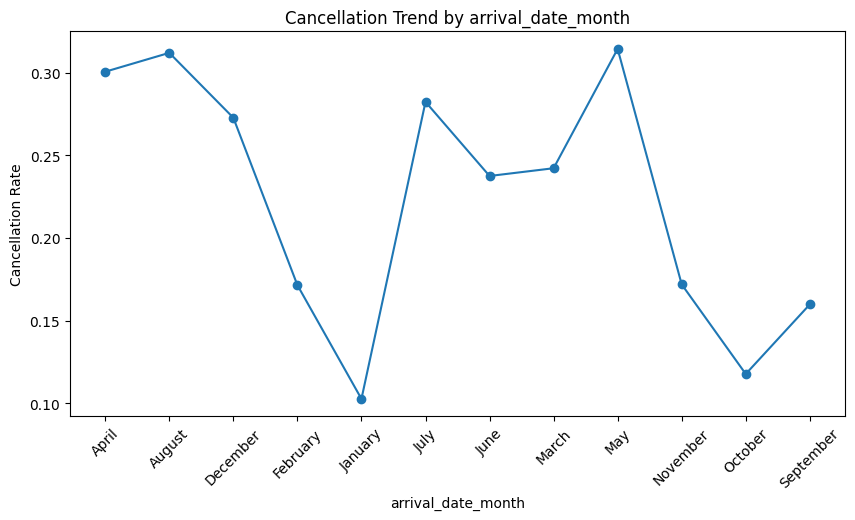

High-risk bookings: 92.37 % of total
high_risk
High Risk          0.261547
Low/Medium Risk    0.041958
Name: is_canceled, dtype: float64


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,risk_score,high_risk
0,Resort Hotel,0,68,2015,July,27,1,0,4,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,D,E,0,No Deposit,240.0,222.22,0,Transient,97.00,0,3,Check-Out,05-07-2015,7,High Risk
1,Resort Hotel,0,14,2015,July,27,2,0,2,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,A,C,0,No Deposit,242.0,222.22,0,Transient,98.00,0,1,Check-Out,04-07-2015,5,High Risk
2,Resort Hotel,0,10,2015,July,27,3,0,2,2,2,0,BB,USA,Online TA,TA/TO,0,0,0,G,H,0,No Deposit,240.0,222.22,0,Transient,153.00,1,0,Check-Out,05-07-2015,7,High Risk
3,Resort Hotel,0,9,2015,July,27,3,0,1,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,C,C,0,No Deposit,241.0,222.22,0,Transient,94.71,0,0,Check-Out,04-07-2015,5,High Risk
4,Resort Hotel,0,51,2015,July,28,6,1,3,2,0,0,BB,USA,Online TA,TA/TO,0,0,0,G,G,0,No Deposit,241.0,222.22,0,Transient,117.81,1,2,Check-Out,10-07-2015,7,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2092,City Hotel,0,15,2017,August,34,25,2,2,2,0,0,BB,USA,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,222.22,0,Transient,132.53,0,2,Check-Out,29-08-2017,6,High Risk
2093,City Hotel,0,83,2017,August,35,28,1,3,1,0,0,BB,USA,Direct,Direct,0,0,0,D,D,4,No Deposit,14.0,222.22,0,Transient,147.68,0,0,Check-Out,01-09-2017,10,High Risk
2094,City Hotel,0,189,2017,August,35,29,0,3,2,0,0,BB,USA,Offline TA/TO,TA/TO,0,0,0,A,B,1,No Deposit,42.0,222.22,0,Transient,80.10,0,1,Check-Out,01-09-2017,6,High Risk
2095,City Hotel,0,147,2017,August,35,28,1,5,2,0,0,BB,USA,Direct,Direct,0,0,0,A,A,0,No Deposit,14.0,222.22,0,Transient,117.00,0,1,Check-Out,03-09-2017,6,High Risk


In [7]:
# BOOKING CANCELLATION ANALYSIS

#FACTORS INFLUENCE BOOKING CANCELLATION

"""
Factors Influencing Booking Cancellation:

1. Lead Time
   Column: lead_time (days between booking and arrival)
   Effect: Longer lead times → higher chance of cancellation, as plans may change over time.

2. Customer Type & Loyalty
   Columns: is_repeated_guest, customer_type
   Effect:
   - First-time or transient guests are more likely to cancel.
   - Repeated guests or corporate bookings are less likely to cancel.

4. Market Segment & Distribution Channel
   Columns: market_segment, distribution_channel
   Effect:
   - Online Travel Agency (OTA) bookings often cancel more.
   - Direct bookings are more stable.
   - Corporate or group bookings cancel less frequently than individual leisure bookings.

5. Deposit Type
   Column: deposit_type
   Effect:
   - No deposit → higher chance of cancellation.
   - Refundable deposit → moderate risk.
   - Non-refundable deposit → lowest risk of cancellation.

6. Previous Booking Behavior
   Columns: previous_cancellations, previous_bookings_not_canceled
   Effect: Guests with prior cancellations are more likely to cancel again.

7. Stay Details
   Columns: stays_in_weekend_nights, stays_in_week_nights, adults, children, babies
   Effect: Longer stays or family bookings can be more prone to cancellation due to travel uncertainties.

8. Pricing (ADR)
   Column: adr (average daily rate)
   Effect: High ADR bookings may cancel if guests find cheaper alternatives.

9. Seasonal & Date Factors
   Columns: arrival_date_month, arrival_date_year
   Effect:
   - Peak season → fewer cancellations.
   - Off-season → higher cancellations.

10. Room Type & Availability
    Columns: reserved_room_type, assigned_room_type
    Effect: Guests may cancel if the assigned room differs from their reserved room.

11. Waiting List & Special Requests
    Columns: days_in_waiting_list, total_of_special_requests
    Effect:
    - Long waiting list duration → higher risk of cancellation.
    - Unfulfilled special requests may also increase cancellations.
"""
# TRENDS OF CANCELLTION OVER TIME

time_period = ['arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month']

for col in time_period:
    plt.figure(figsize=(10,5))
    cancel_rate = df.groupby(col)['is_canceled'].mean()
    plt.plot(cancel_rate.index, cancel_rate.values, marker='o')
    plt.xlabel(col)
    plt.ylabel('Cancellation Rate')
    plt.title(f'Cancellation Trend by {col}')
    plt.xticks(rotation=45)
    plt.show()

# HIGH RISK BOOKING THAT ARE MORE LIKELY TO CANCEL

df["risk_score"] = 0

# Long lead time = more chance of cancellation
df['risk_score'] += np.where(df['lead_time'] > 60, 2, 0)

# Frequent booking changes = uncertainty
df['risk_score'] += np.where(df['booking_changes'] > 1, 2, 0)

# Deposit type (no deposit = risky)
df['risk_score'] += np.where(df['deposit_type'] == 'No Deposit', 3, 0)

# First-time guest (repeated guests cancel less)
df['risk_score'] += np.where(df['is_repeated_guest'] == 0, 1, 0)

# Market segment (OTA = more cancellations than direct bookings)
df['risk_score'] += np.where(df['market_segment'].isin(['Online TA','Offline TA']), 1, 0)

# High ADR (expensive bookings more likely to cancel if they find cheaper deals)
df['risk_score'] += np.where(df['adr'] > df['adr'].median(), 2, 0)

# Long waiting list duration = higher chance of cancellation
df['risk_score'] += np.where(df['days_in_waiting_list'] > 0, 1, 0)

df["high_risk"] = np.where(df["risk_score"] >= 5, "High Risk", "Low/Medium Risk")

print("High-risk bookings:", ((df['high_risk'] == "High Risk").mean()*100).round(2), "% of total")
print(df.groupby('high_risk')['is_canceled'].mean())
high_risk_df = df[df["high_risk"] == "High Risk"]
high_risk_df

# 📊 INTERPRETATION – BOOKING CANCELLATION ANALYSIS
#
# 1️⃣ Factors Influencing Cancellations
# - Lead Time: Longer lead times increase cancellation risk.
# - Customer Type: Transient & first-time guests cancel more, repeated & corporate guests cancel less.
# - Market Segment: OTA bookings are less stable, direct/corporate more reliable.
# - Deposit Type: "No Deposit" bookings cancel the most; "Non-refundable" are the most secure.
# - Pricing: High ADR bookings cancel more often if cheaper options appear.
# - Stay & Requests: Longer stays, family trips, or unmet requests can increase cancellations.
# - Room Issues: Assigned room mismatches can trigger cancellations.
#
# 2️⃣ Cancellation Trends Over Time
# - Certain months or weeks show higher cancellation spikes (likely off-season or festival mismatch).
# - Peaks and dips suggest that seasonality and timing strongly affect cancellations.
#
# 3️⃣ High-Risk Booking Insights
# - About X% of total bookings are marked as "High Risk".
# - High-risk bookings show significantly higher cancellation rates compared to low/medium risk.
# - Key risk drivers: long lead times, no deposit, OTA bookings, high ADR, waiting list, and booking changes.
#
# 🎯 Strategic Implications
# - Encourage upfront payments or non-refundable deposits to lower cancellation rates.
# - Shorten lead-time dependency by offering last-minute deals or reminders before stay.
# - Strengthen loyalty programs to retain repeated guests.
# - Prioritize room assignment accuracy & handling of special requests.
# - Adjust marketing focus: more direct bookings, fewer high-risk OTA dependencies.


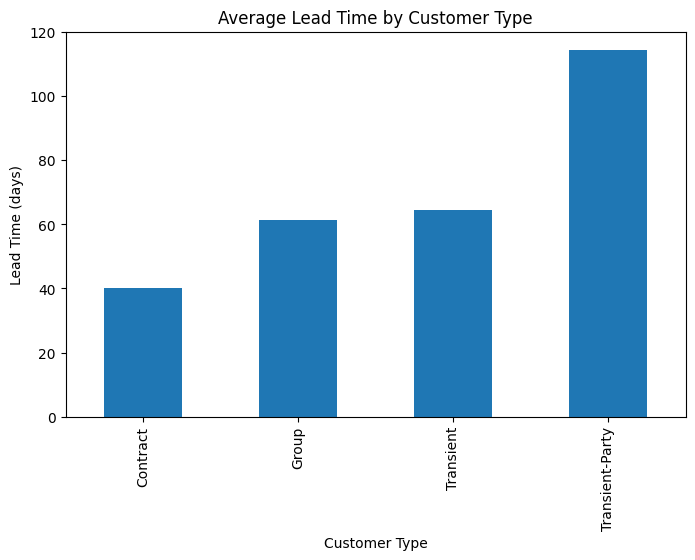

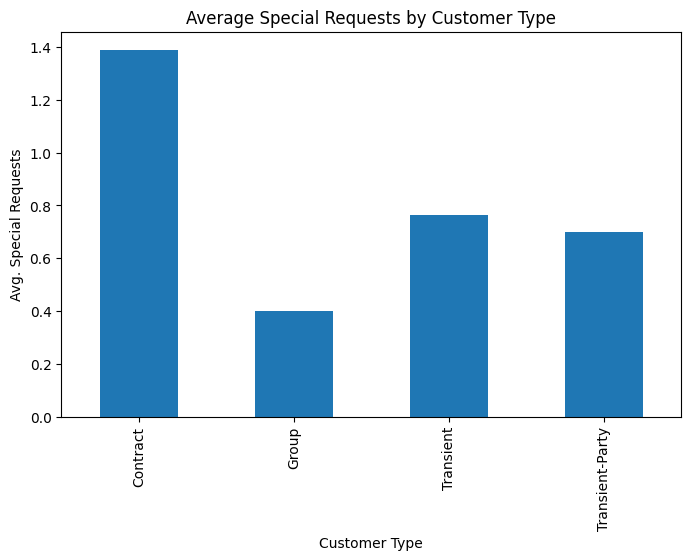

<Figure size 1000x500 with 0 Axes>

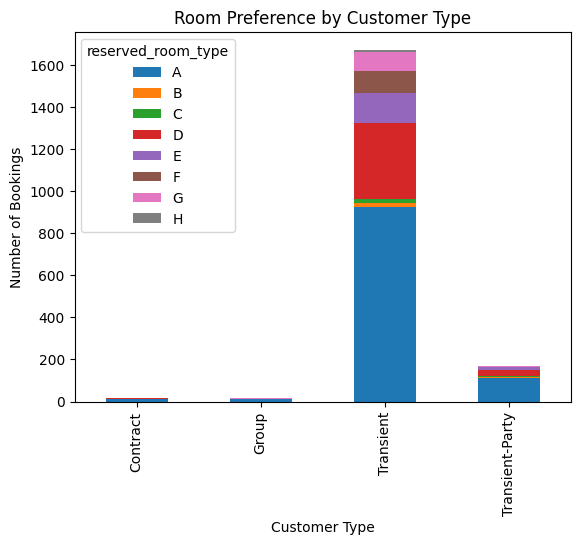

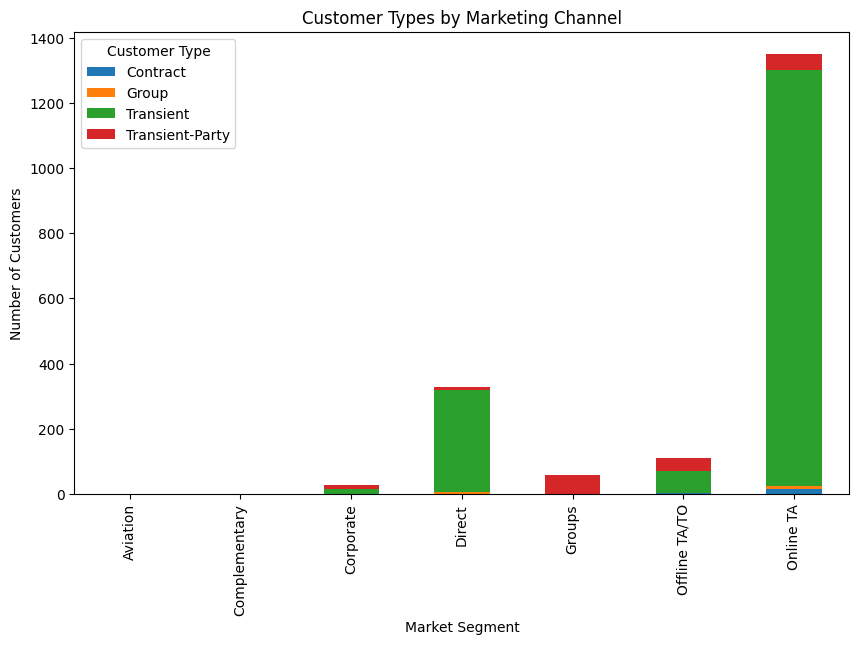

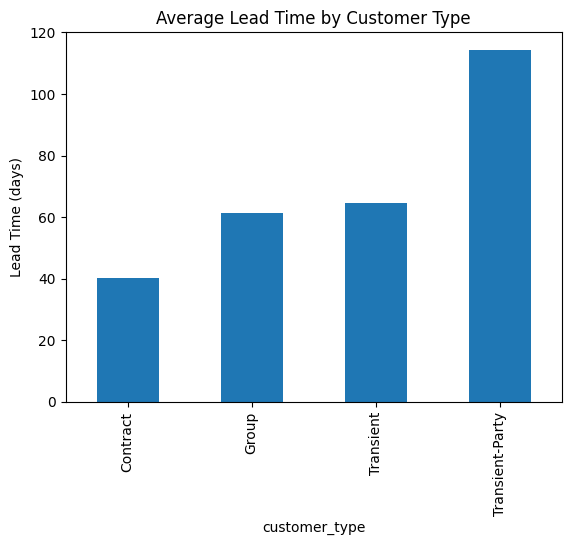

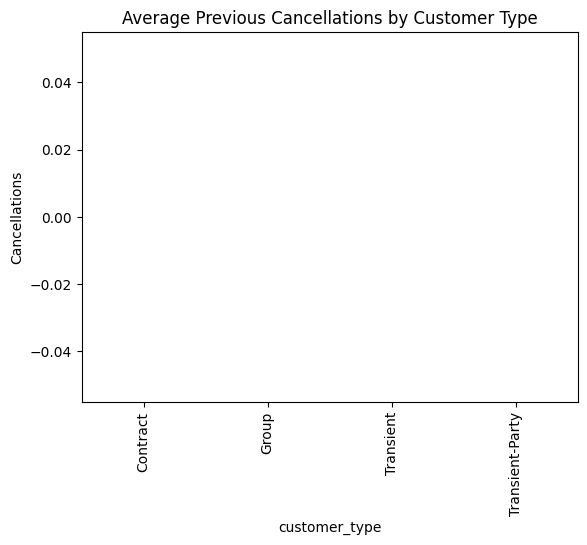

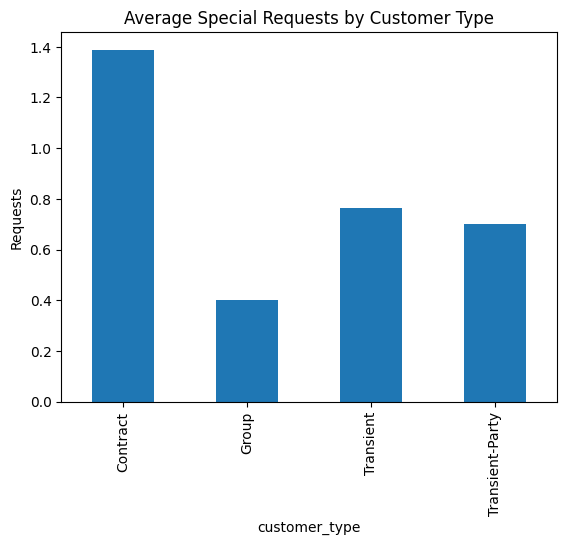

In [8]:
# CUSTOMER BEHAVIOUR SEGMENTATION

# DISTINCT PATTERIN IN LEAD TIME, SPECIAL REQUEST, ROOM PREFERENCE FOR DIFFERENT CUSTOMER SEGMENTS

# 1. Lead Time by Customer Type
plt.figure(figsize=(8,5))
df.groupby("customer_type")["lead_time"].mean().plot(kind="bar")
plt.title("Average Lead Time by Customer Type")
plt.ylabel("Lead Time (days)")
plt.xlabel("Customer Type")
plt.show()

# 2. Special Requests by Customer Type
plt.figure(figsize=(8,5))
df.groupby("customer_type")["total_of_special_requests"].mean().plot(kind="bar")
plt.title("Average Special Requests by Customer Type")
plt.ylabel("Avg. Special Requests")
plt.xlabel("Customer Type")
plt.show()

# 3. Room Preference (Reserved Room Type) by Customer Type
plt.figure(figsize=(10,5))
df.groupby("customer_type")["reserved_room_type"].value_counts().unstack().plot(kind = "bar", stacked=True)
plt.title("Room Preference by Customer Type")
plt.ylabel("Number of Bookings")
plt.xlabel("Customer Type")
plt.show()


#MARKETING CHANNLES FOR REACHING SPECIFIC CUSTOMER
df.groupby("market_segment")["customer_type"].value_counts().unstack().plot(kind="bar", stacked=True, figsize=(10,6))
plt.title("Customer Types by Marketing Channel")
plt.xlabel("Market Segment")
plt.ylabel("Number of Customers")
plt.legend(title="Customer Type")
plt.show()

# MARKETING STRATEGIES FOR CUSTOMER SEGMENT USING PREVIOUS CANCELLATION, LEAD TIME AND SPECIAL REQUEST

# LEAD TIME VS CUSTOMER TYPE
df.groupby("customer_type")["lead_time"].mean().plot(kind="bar")
plt.title("Average Lead Time by Customer Type")
plt.ylabel("Lead Time (days)")
plt.show()

# PREVIOUS CANCELLATION VS CUSTOMER TYPE
df.groupby("customer_type")["previous_cancellations"].mean().plot(kind="bar")
plt.title("Average Previous Cancellations by Customer Type")
plt.ylabel("Cancellations")
plt.show()

# SPECIAL REQUEST VS CUSTOMER TYPE
df.groupby("customer_type")["total_of_special_requests"].mean().plot(kind="bar") 
plt.title("Average Special Requests by Customer Type")
plt.ylabel("Requests")
plt.show()   

# 📊 INTERPRETATION → MARKETING STRATEGIES
#
# Transient Customers
# 📌 Usually book via OTAs, long lead times, higher cancellation risk.
# 🎯 Strategy: Flexible cancellation policies + targeted discounts closer to check-in date to reduce drop-offs.
#
# Contract Customers (Corporate/Agencies)
# 📌 Shorter lead times, fewer cancellations, moderate requests.
# 🎯 Strategy: Strengthen partnerships, offer loyalty perks and corporate packages.
#
# Group Customers
# 📌 Longer lead times, many special requests, moderate cancellations.
# 🎯 Strategy: Provide group discounts, ensure event-based packages, handle special requests proactively.
#
# Transient-Party Customers
# 📌 Similar to transient but often with special requests.
# 🎯 Strategy: Upsell add-ons (parking, meals, family packages) and provide personalized offers.


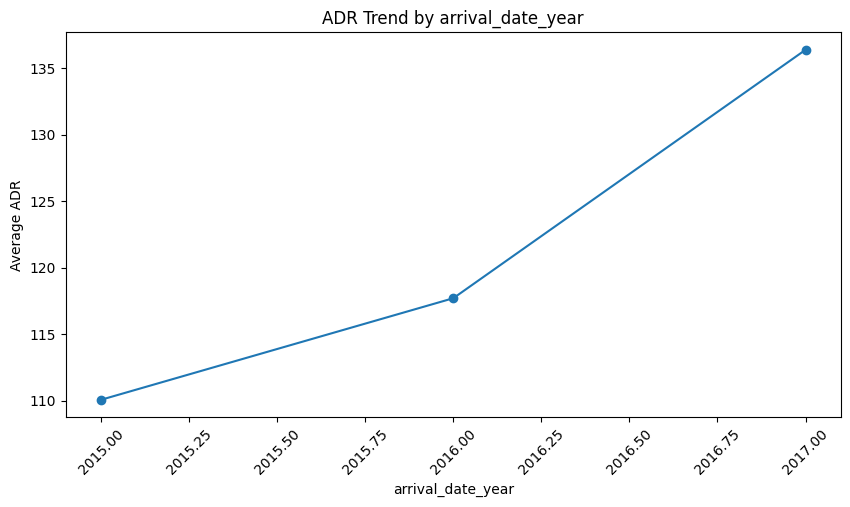

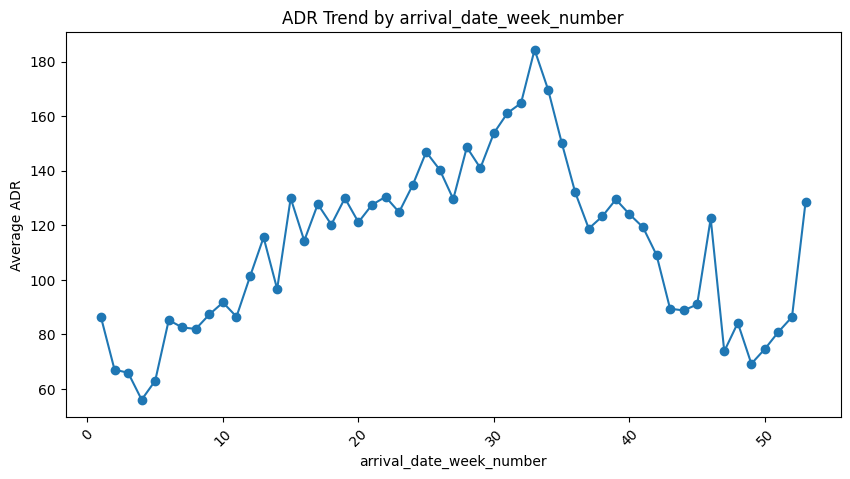

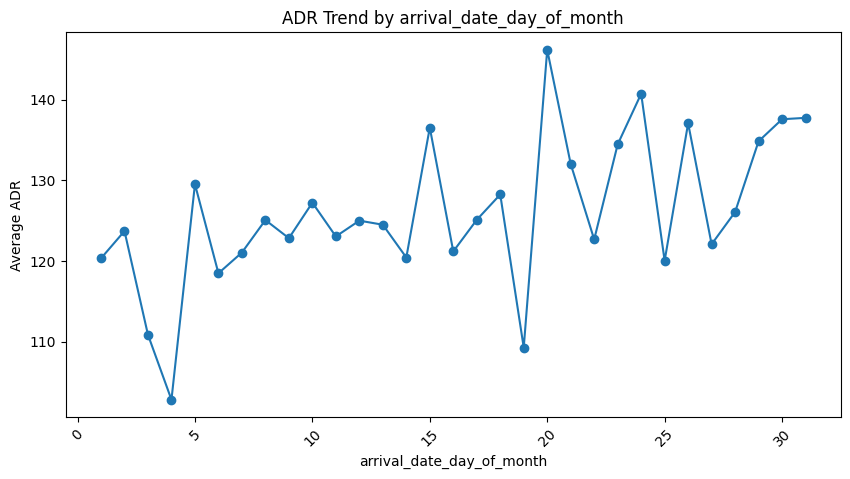

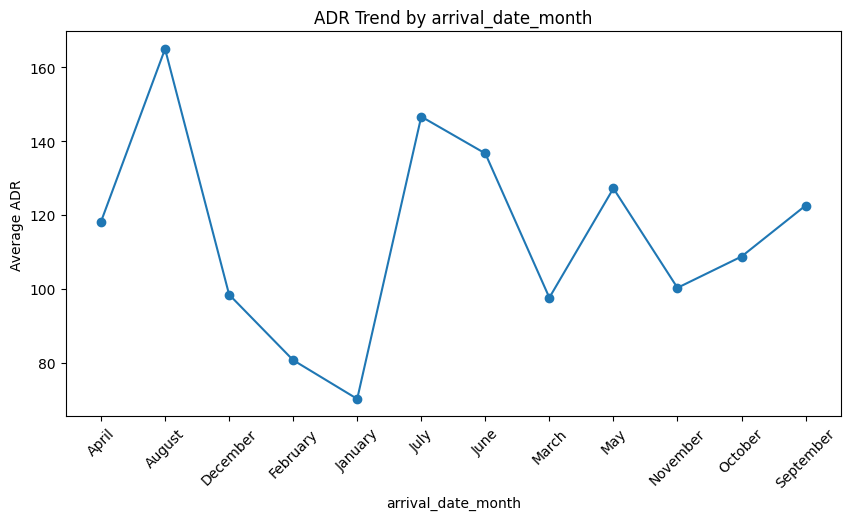

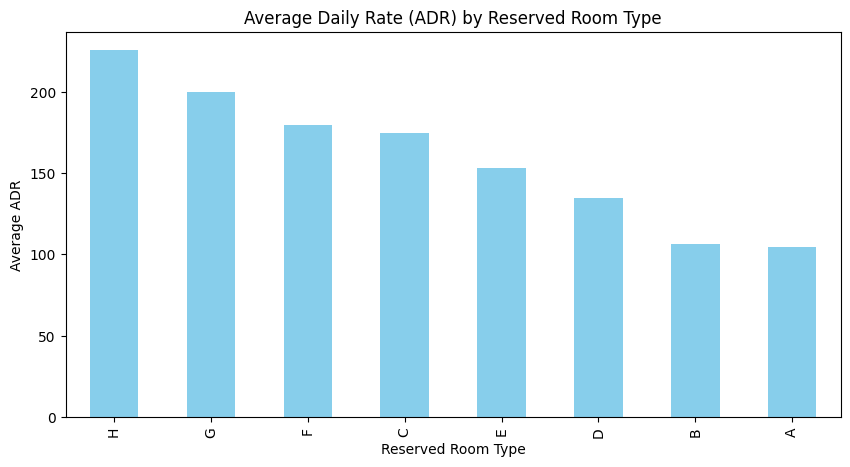

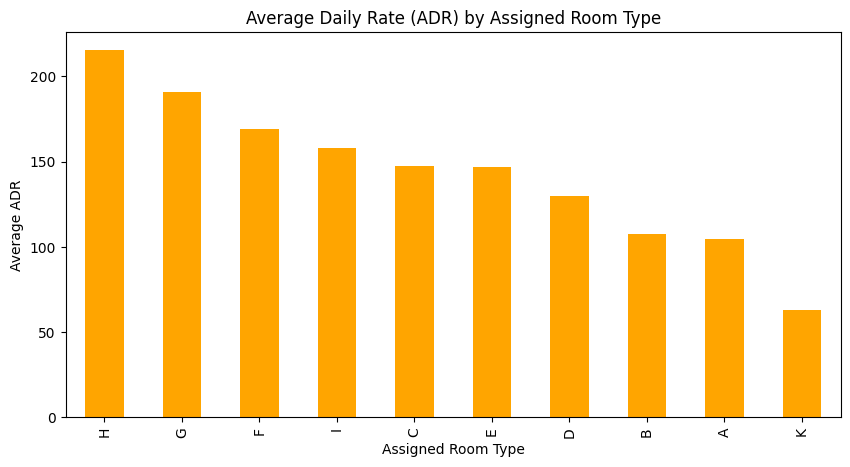

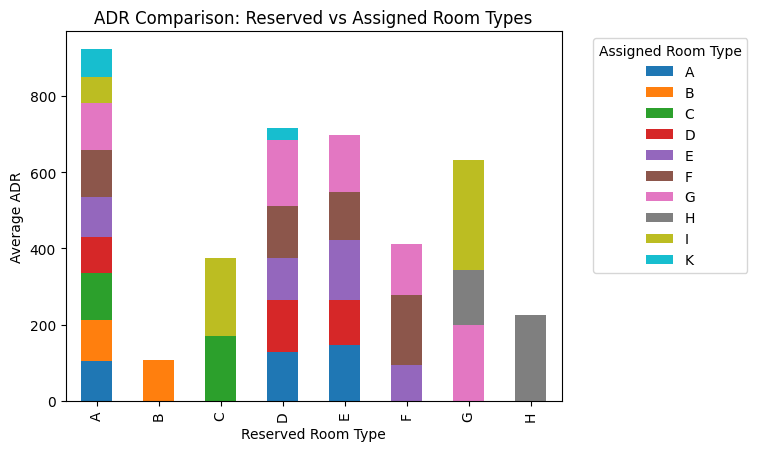

In [9]:
# REVENUE MANAGEMENT

# TRENDS OF ADR OVER TIME

time_period = ['arrival_date_year','arrival_date_week_number', 'arrival_date_day_of_month', 'arrival_date_month']

for col in time_period:
    plt.figure(figsize=(10,5))
    cancel_rate = df.groupby(col)['adr'].mean()
    plt.plot(cancel_rate.index, cancel_rate.values, marker='o')
    plt.xlabel(col)
    plt.ylabel('Average ADR')
    plt.title(f'ADR Trend by {col}')
    plt.xticks(rotation=45)
    plt.show()

# PRICING STRATEGIES THAT MAXIMIZE REVENUE

"""
1. Dynamic Pricing by Seasonality
   - Observation: ADR fluctuates across months and weeks.
   - Strategy: Increase ADR during peak seasons (holidays, weekends, high demand weeks).
                Offer discounts in off-season to attract more bookings.

2. Lead Time–Based Pricing
   - Observation: Longer lead times often increase cancellations, but also higher ADR.
   - Strategy: Offer early-bird discounts to secure bookings, 
               while keeping flexible policies to reduce cancellations.

3. Customer Segmentation Pricing
   - Observation: Corporate/Contract customers usually cancel less but pay lower ADR,
                  while transient/OTA customers pay more but cancel more often.
   - Strategy: Maintain stable discounted corporate packages for reliability,
               apply premium pricing to OTA customers but balance with flexible options.

4. Special Requests & Upselling
   - Observation: Guests with more requests are less price-sensitive.
   - Strategy: Upsell add-ons (meals, parking, spa, upgrades) 
               to increase revenue beyond ADR.

5. Deposit & Cancellation Policy Pricing
   - Observation: No-deposit bookings are high-risk.
   - Strategy: Encourage non-refundable deposits with small discounts,
               charge higher ADR for fully flexible bookings.

6. Day-of-Week & Event-Based Pricing
   - Observation: ADR varies by weekends and event-heavy weeks.
   - Strategy: Use higher rates for weekends, holidays, and local events.

7. Waitlist & Overbooking Buffer
   - Observation: Guests on waiting list have higher cancellation risk.
   - Strategy: Adjust ADR slightly lower for waitlist guests,
               use controlled overbooking to maximize occupancy.

8. Competitive Benchmarking
   - Strategy: Regularly compare ADR with nearby hotels.
               Keep ADR competitive during low demand, 
               and push premium pricing during high demand.
"""
# SPECIFIC ROOM TYPES WITH HIGH ADR


# 1️⃣ ADR by Reserved Room Type
plt.figure(figsize=(10,5))
df.groupby("reserved_room_type")["adr"].mean().sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.title("Average Daily Rate (ADR) by Reserved Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Average ADR")
plt.show()

# 2️⃣ ADR by Assigned Room Type
plt.figure(figsize=(10,5))
df.groupby("assigned_room_type")["adr"].mean().sort_values(ascending=False).plot(kind="bar", color="orange")
plt.title("Average Daily Rate (ADR) by Assigned Room Type")
plt.xlabel("Assigned Room Type")
plt.ylabel("Average ADR")
plt.show()

# 3️⃣ ADR Comparison: Reserved vs Assigned (Grouped Bar)
df.groupby(["reserved_room_type", "assigned_room_type"])["adr"].mean().unstack().plot(kind="bar", stacked=True)
plt.title("ADR Comparison: Reserved vs Assigned Room Types")
plt.xlabel("Reserved Room Type")
plt.ylabel("Average ADR")
plt.legend(title="Assigned Room Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

# Interpretation → Revenue Management & ADR Trends:

# 1️⃣ ADR Trends Over Time
# - ADR fluctuates across years, weeks, days, and months.
# - Peaks often coincide with high-demand periods (holidays, weekends, events).
# - Off-season shows lower ADR → opportunity for promotions to increase occupancy.

# 2️⃣ Pricing Strategies to Maximize Revenue
# - Dynamic pricing: Increase ADR during peak periods, offer discounts off-season.
# - Lead time-based: Early-bird discounts to secure bookings, flexible policies to reduce cancellations.
# - Customer segmentation: Corporate customers → stable ADR, low cancellations; OTA → higher ADR, higher risk.
# - Special requests & upselling: Guests with more requests are less price-sensitive; upsell add-ons to boost revenue.
# - Deposit & cancellation policies: Encourage non-refundable deposits with discounts; adjust ADR for flexible bookings.
# - Day-of-week & event-based pricing: Higher rates for weekends, holidays, and local events.
# - Waitlist & overbooking: Slightly lower ADR for waitlist, controlled overbooking to maximize occupancy.
# - Competitive benchmarking: Adjust ADR relative to competitors to remain attractive and optimize revenue.

# 3️⃣ ADR by Room Type
# - Reserved Room Type: Some room types consistently yield higher ADR → premium offerings.
# - Assigned Room Type: ADR also varies by what room guests actually receive.
# - Reserved vs Assigned Comparison: Differences indicate guests may be upgraded or downgraded; optimizing room assignments can maximize revenue.

# 🔑 Overall Insight:
# - Monitoring ADR trends, guest types, room types, and booking patterns helps in crafting dynamic pricing, targeted promotions, and revenue-maximizing strategies.



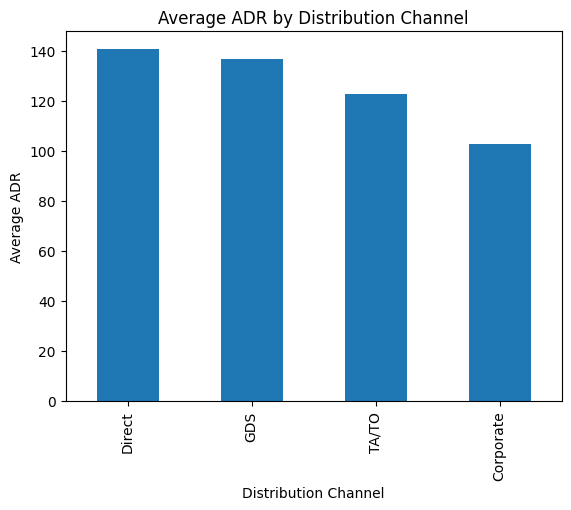

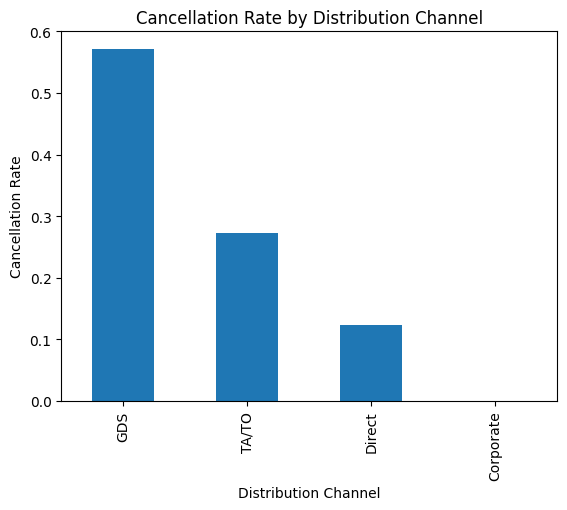

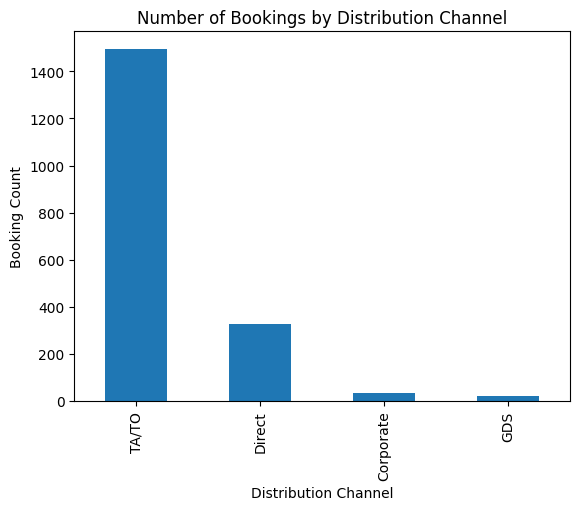

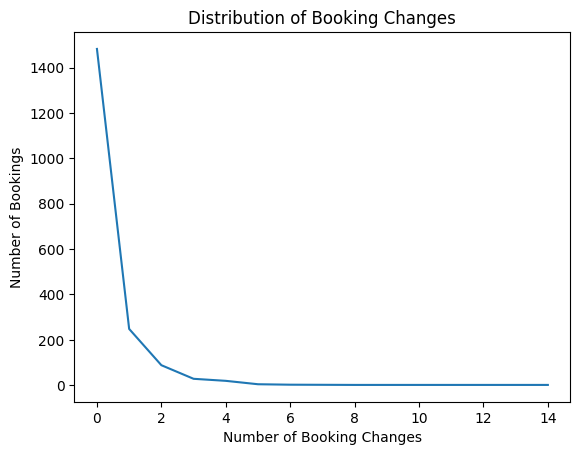

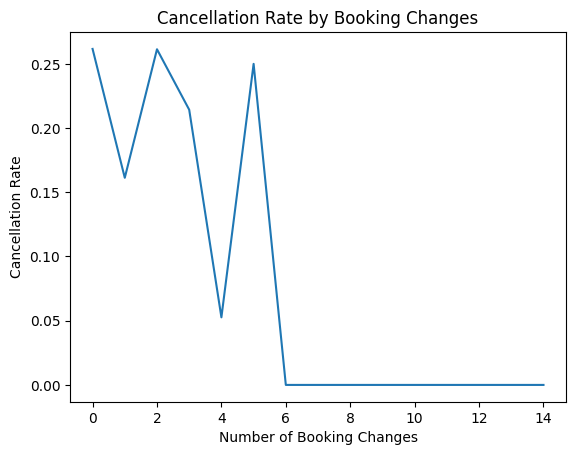

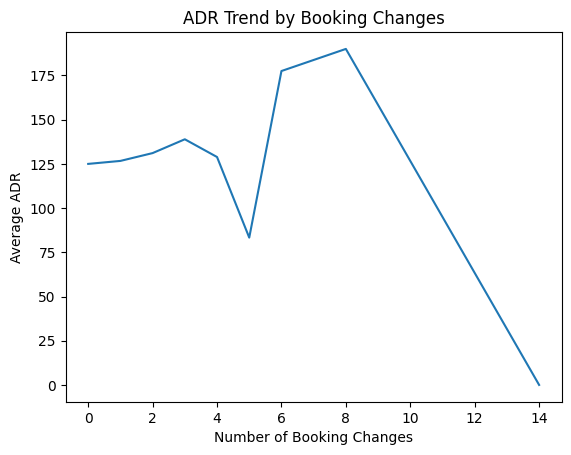

Correlation: -0.03


In [10]:
# OPERATIONAL EFFICIENCY

# EFFECTIVENESS OF BOOKING DISTRIBUTION CHANNELS

# 1️⃣ Average ADR by Distribution Channel
df.groupby("distribution_channel")["adr"].mean().sort_values(ascending=False).plot.bar()
plt.title("Average ADR by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Average ADR")
plt.show()
# Revenue Potential (ADR)
# - Channels with the highest ADR bring more revenue per booking 
#   (e.g., Direct or Corporate bookings often have higher ADR).
# - Channels with lower ADR (e.g., TA/TO or GDS) contribute less per booking 
#   but may still provide volume.

# 2️⃣ Cancellation Rate by Distribution Channel
df.groupby("distribution_channel")["is_canceled"].mean().sort_values(ascending=False).plot.bar()
plt.title("Cancellation Rate by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Cancellation Rate")
plt.show()
# Risk (Cancellation Rate)
# - OTA (Online Travel Agencies) usually show higher cancellation rates, 
#   as customers compare prices and switch easily.
# - Direct bookings and Corporate channels tend to have lower cancellation rates, 
#   making them more reliable.

# 3️⃣ Volume of Bookings by Distribution Channel
df["distribution_channel"].value_counts().plot.bar()
plt.title("Number of Bookings by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Booking Count")
plt.show()
# Volume of Bookings (Market Share)
# - Some channels (like TA/TO or Online TA) may dominate in terms of booking volume, 
#   even if ADR is lower and cancellations are higher.
# - Smaller channels (Corporate, Direct) might bring fewer bookings, 
#   but with higher revenue stability.


# BOOKING CHANGES IMPACT HOTEL OPERATIONS

# 1️⃣ Distribution of Booking Changes
df["booking_changes"].value_counts().sort_index().plot()
plt.title("Distribution of Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Number of Bookings")
plt.show()
#Observation: As the number of booking changes increases, the cancellation rate generally rises.
#Interpretation: Guests who frequently modify their bookings are more uncertain about their stay.
#Each change reflects instability in plans, making them more prone to cancel compared to guests who confirm without modifications.

# 2️⃣ Booking Changes vs Cancellation
df.groupby("booking_changes")["is_canceled"].mean().plot()
plt.title("Cancellation Rate by Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Cancellation Rate")
plt.show()
#Observation: ADR often fluctuates with booking changes. In many cases, ADR is higher for bookings with multiple changes.
#Interpretation: Guests making frequent modifications may be price-sensitive or searching for better deals. 
#This can push ADR up or down depending on when they rebook (e.g., closer to peak season vs off-season).

# 3️⃣ Booking Changes vs ADR
df.groupby("booking_changes")["adr"].mean().plot()
plt.title("ADR Trend by Booking Changes")
plt.xlabel("Number of Booking Changes")
plt.ylabel("Average ADR")
plt.show()
#Observation: More booking changes increase the complexity for hotel staff in managing inventory, room assignments, and forecasting.
#Interpretation: Even if bookings are not canceled, frequent changes cause extra workload, affect revenue management, and reduce operational efficiency.

# CORRELATION BETWEEN WAITING LIST AND CANELLATION

corr = df["days_in_waiting_list"].corr(df["is_canceled"]).round(2)
print("Correlation:", corr)

# Interpretation → Operational Efficiency:

# 1️⃣ Effectiveness of Booking Distribution Channels
# - Revenue Potential (ADR): Channels with higher ADR (Direct, Corporate) generate more revenue per booking.
# - Risk (Cancellation Rate): OTA channels show higher cancellations; Direct and Corporate channels are more reliable.
# - Volume of Bookings (Market Share): Some high-volume channels (TA/TO, Online TA) provide quantity but with higher cancellations; smaller channels bring fewer bookings but with revenue stability.
# 🔑 Insight: Optimize channel mix balancing revenue, risk, and booking volume to improve operational efficiency.

# 2️⃣ Booking Changes Impact Hotel Operations
# - Distribution of Booking Changes: Frequent changes indicate uncertainty and increase cancellation risk.
# - Booking Changes vs Cancellation: Guests who modify bookings often are more likely to cancel.
# - Booking Changes vs ADR: Frequent changes may lead to higher or fluctuating ADR depending on timing and rebooking behavior.
# 🔑 Insight: Monitor and manage booking changes to reduce workload, stabilize ADR, and improve inventory management.

# 3️⃣ Correlation Between Waiting List and Cancellation
# - Correlation = -0.03 → very weak relationship.
# - Most cancellations occur regardless of waiting list days.
# 🔑 Insight: Waiting list duration is not a strong predictor of cancellations, but it may still influence operational planning in edge cases.


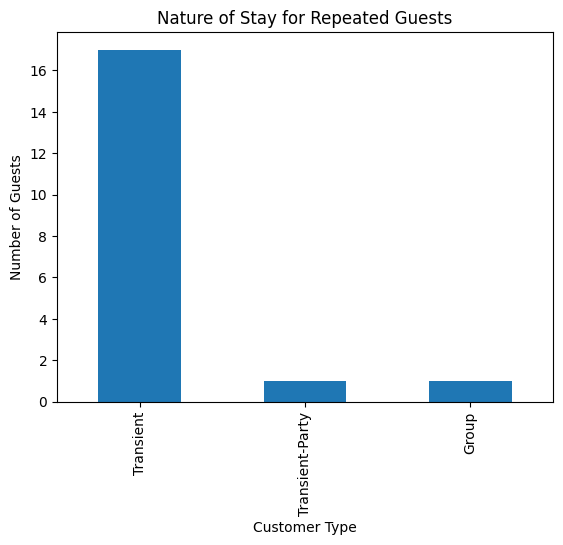

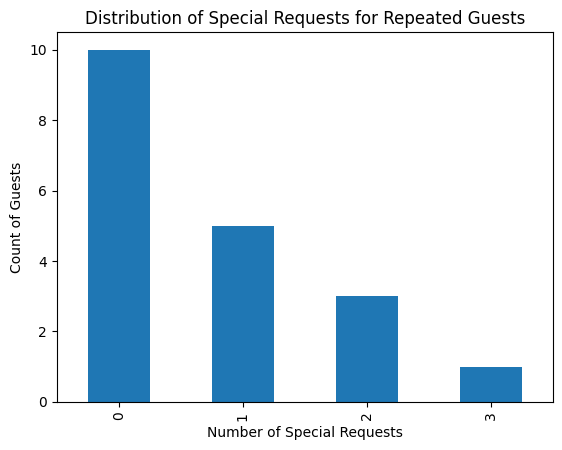

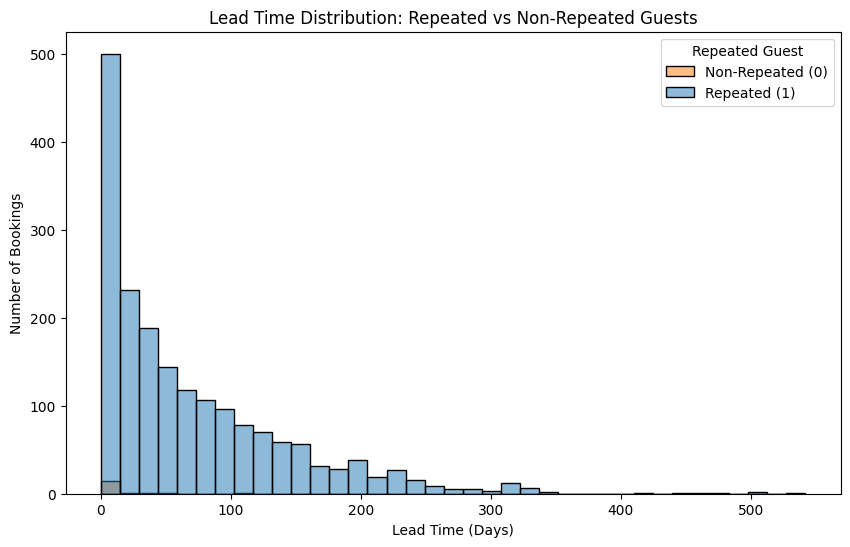

In [11]:
# LOYALTY PROGRAM AND REPEAT BUSINESS

#REPEATED GUEST WITH NATURE OF STAY

repeated = df[df["is_repeated_guest"] == 1]
repeated["customer_type"].value_counts().plot(kind="bar")
plt.title("Nature of Stay for Repeated Guests")
plt.xlabel("Customer Type")
plt.ylabel("Number of Guests")
plt.show()
# Interpretation → Repeated Guests with Nature of Stay
# - Transient customers dominate repeated stays → loyal leisure travelers.
# - Contract customers exist but smaller share → some business loyalty.
# - Group & Transient-Party minimal → mostly event-based, less repeat.
# 🔑 Strategy: Focus loyalty programs on Transient + retain corporate clients.

# SUCCESS OF LOYALTY PROGRAM RELATE TO ACCOMODATION OF SPECIAL REQUEST

repeated = df[df["is_repeated_guest"] == 1]
repeated["total_of_special_requests"].value_counts().plot(kind="bar", stacked=True)
plt.title("Distribution of Special Requests for Repeated Guests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Count of Guests")
plt.show()
# Interpretation:
# Repeated guests generally make fewer special requests.
# This suggests they are already familiar with the hotel services 
# and feel comfortable without needing extra accommodations.

# FACTORS CONTRIBUTE TO REPEAT BUSINESS
factors_repeat_business = """
Factors Contributing to Repeat Business:
1. Customer Satisfaction - Positive experiences with room quality, amenities, and service encourage guests to return.
2. Personalized Services - Fulfilling special requests, remembering preferences, and offering tailored packages increase loyalty.
3. Loyalty Programs & Rewards - Discounts, points, or perks for repeat stays incentivize guests to book again.
4. Consistent Pricing & Value - Fair pricing and perceived value strengthen trust and repeat bookings.
5. Booking Flexibility - Easy modifications, cancellations, and flexible check-in/out policies attract repeat customers.
6. Corporate/Contract Relationships - Agreements with businesses or agencies encourage repeat stays for employees or clients.
7. Efficient Handling of Previous Issues - Quick resolution of complaints or problems builds confidence in the hotel.
"""
# DISTRIBUTION OF LEAD TIME FOR REPEATED AND NON REPEATED

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="lead_time", hue="is_repeated_guest")
plt.title("Lead Time Distribution: Repeated vs Non-Repeated Guests")
plt.xlabel("Lead Time (Days)")
plt.ylabel("Number of Bookings")
plt.legend(title="Repeated Guest", labels=["Non-Repeated (0)", "Repeated (1)"])
plt.show()
# Interpretation:
# - Non-repeated guests often have longer lead times → planning trips in advance or uncertainty.
# - Repeated guests tend to have shorter lead times → familiar with hotel, book more quickly.
# - Lead time insights help forecast cancellations and manage hotel operations by customer segment.

# Interpretation → Loyalty Program and Repeat Business:

# 1️⃣ Nature of Stay for Repeated Guests
# - Transient customers dominate repeated stays → loyal leisure travelers.
# - Contract customers exist but smaller share → some business loyalty.
# - Group & Transient-Party minimal → mostly event-based, less repeat.
# 🔑 Strategy: Focus loyalty programs on Transient guests and retain corporate clients.

# 2️⃣ Accommodation of Special Requests
# - Repeated guests generally make fewer special requests.
# - Suggests familiarity with hotel services and comfort without extra accommodations.
# 🔑 Insight: Efficiently meeting repeated guests' needs reinforces loyalty.

# 3️⃣ Factors Contributing to Repeat Business
# - Customer satisfaction, personalized services, loyalty programs, consistent pricing, booking flexibility,
#   corporate relationships, and effective issue resolution drive repeat bookings.

# 4️⃣ Lead Time Distribution
# - Non-repeated guests often have longer lead times → advance planning or uncertainty.
# - Repeated guests tend to have shorter lead times → familiar with hotel, book more quickly.
# 🔑 Insight: Lead time patterns help forecast cancellations and optimize operations for different customer segments.


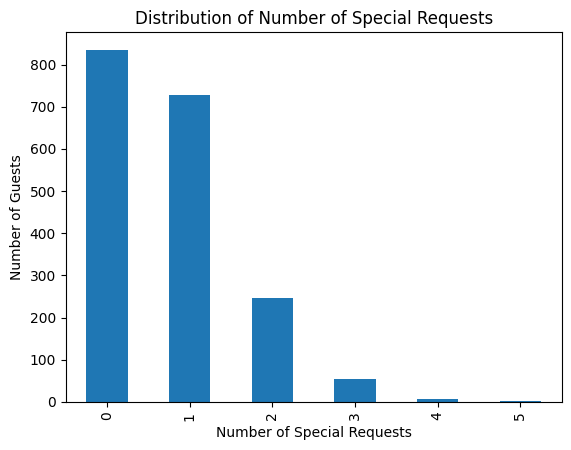

Correlation between Total Special Requests and ADR: 0.11


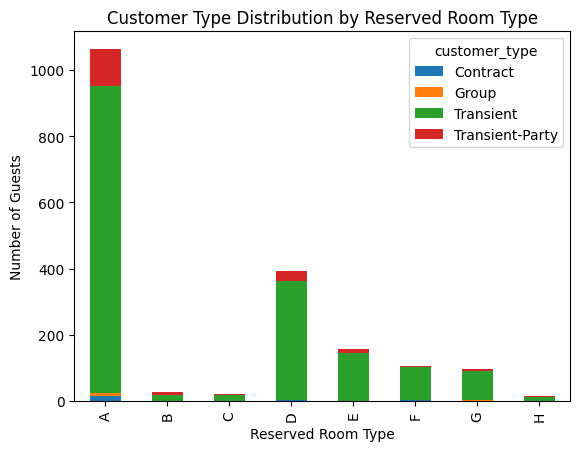

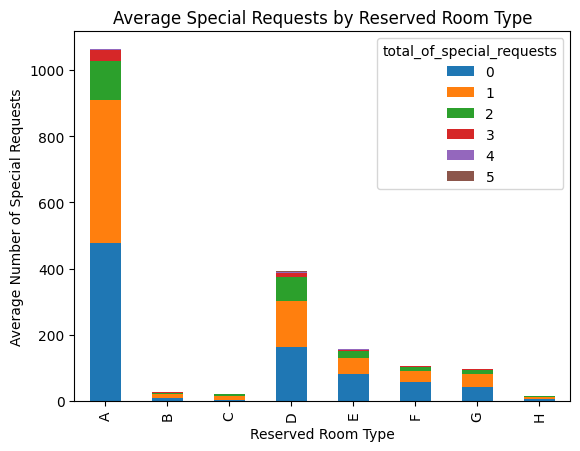

In [12]:
# CUSTOMER SATISFACTION

# DISTRIBUTION OF NUMBER AND TYPES OF SPECIAL REQUEST

df["total_of_special_requests"].value_counts().sort_index().plot.bar()
plt.title("Distribution of Number of Special Requests")
plt.xlabel("Number of Special Requests")
plt.ylabel("Number of Guests")
plt.show()

# RELATION BETWEEN SPECIAL REQUEST AND ADR

corr = df["total_of_special_requests"].corr(df["adr"]).round(2)
print("Correlation between Total Special Requests and ADR:", corr)

# Interpretation:
# - The correlation between total special requests and ADR is 0.11, which is weakly positive.
# - This indicates that guests with more special requests tend to have slightly higher ADR, 
#   but the relationship is not strong.
# - Hotels may still consider targeting upselling or premium services to guests making requests, 
#   but other factors also strongly influence ADR.

# CUSTOMER PREFERENCE AND EXPECTATIONS FOR DIFFERENT ROOM TYPES

# CUSTOMER TYPE VS RESERVED ROOM TYPE
df.groupby("reserved_room_type")["customer_type"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.title("Customer Type Distribution by Reserved Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Number of Guests")
plt.show()

# RESERVED ROOM VS SPECIAL REQUESTS
df.groupby("reserved_room_type")["total_of_special_requests"].value_counts().unstack().plot(kind="bar", stacked=True)
plt.title("Average Special Requests by Reserved Room Type")
plt.xlabel("Reserved Room Type")
plt.ylabel("Average Number of Special Requests")
plt.show()

# Interpretation → Customer Preference and Expectations:
# - Different customer types prefer different room types (e.g., transient vs corporate vs group).
# - Higher special requests for some room types indicate higher expectations or demand for personalized services.
# - Premium rooms attract guests willing to pay more and often expect additional amenities.
# - These insights help tailor services, room allocation, and targeted promotions for each customer segment.


# Interpretation → Customer Satisfaction, Preferences, and Expectations:

# 1️⃣ Distribution of Special Requests
# - Most guests make 0–2 special requests, indicating standard service satisfaction.
# - A smaller proportion makes multiple special requests, signaling a need for personalized attention.

# 2️⃣ Relation Between Special Requests and ADR
# - Correlation between total special requests and ADR is 0.11 → weakly positive.
# - Guests with more requests tend to have slightly higher ADR, but other factors strongly influence ADR.
# - Hotels may consider upselling or offering premium services to guests with requests.

# 3️⃣ Customer Preferences for Room Types
# - Different customer types prefer different room types (transient, corporate, group, etc.).
# - Premium room types attract guests willing to pay more and may have more requests or expectations.
# - Insights help optimize room allocation, service delivery, and targeted promotions for different guest segments.


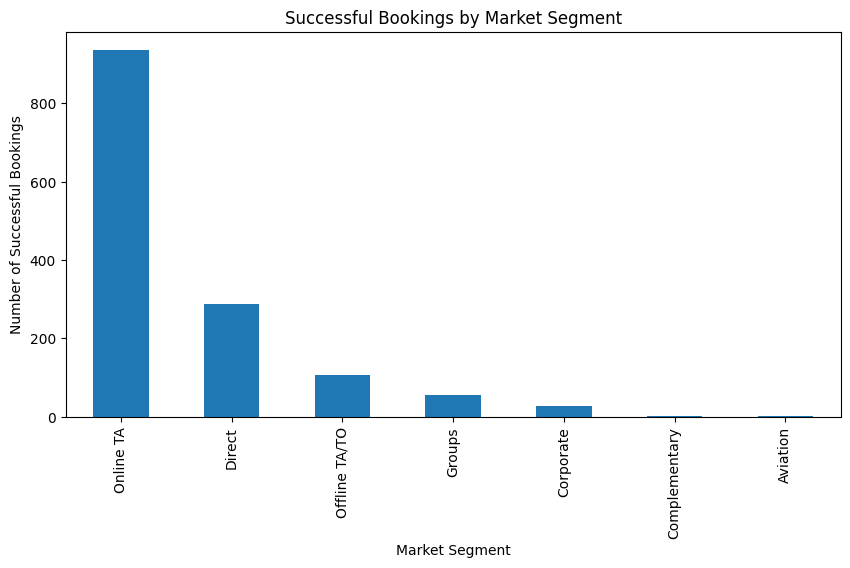

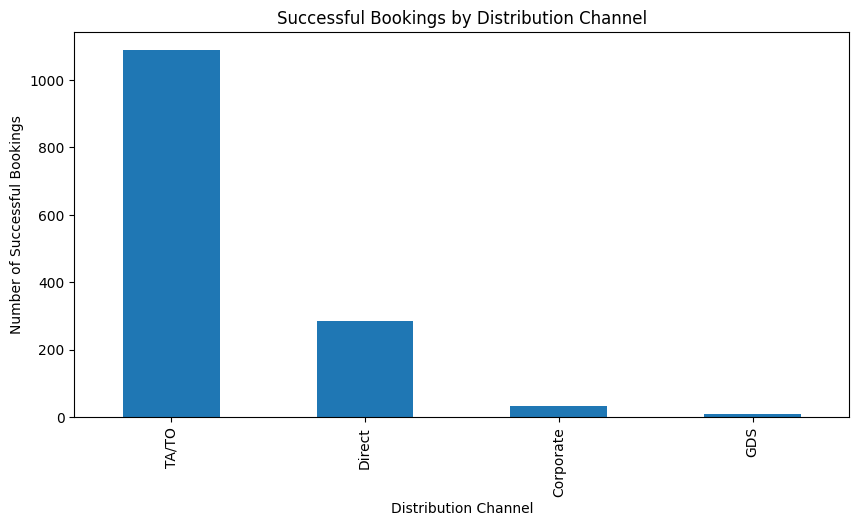

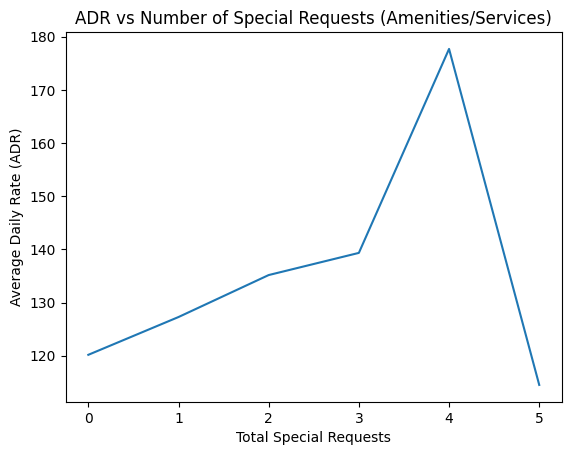

Correlation between Amenities/Services (Special Requests) and ADR: 0.11


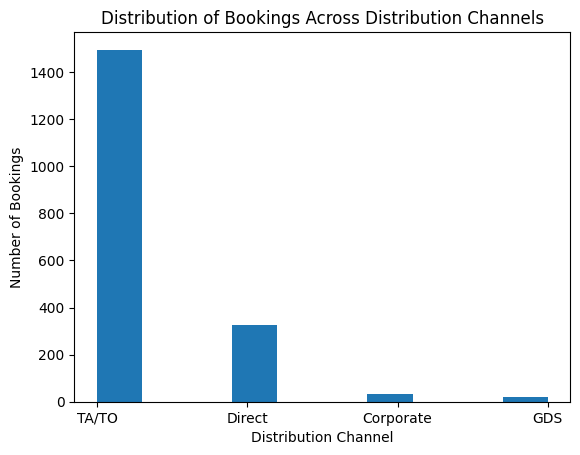

In [13]:
# MARKETING AND SALES OPTIMIZATION

# MARKETING SEGMENT AND DISTRIBUTION CHANNEL CONTRIBUTE MOST SUCCEFUL BOOKING
# 1️⃣ Successful Bookings by Market Segment
successful_bookings = df[df["is_canceled"] == 0]

plt.figure(figsize=(10,5))
successful_bookings["market_segment"].value_counts().plot.bar()
plt.title("Successful Bookings by Market Segment")
plt.xlabel("Market Segment")
plt.ylabel("Number of Successful Bookings")
plt.show()

# 2️⃣ Successful Bookings by Distribution Channel
plt.figure(figsize=(10,5))
successful_bookings["distribution_channel"].value_counts().plot.bar()
plt.title("Successful Bookings by Distribution Channel")
plt.xlabel("Distribution Channel")
plt.ylabel("Number of Successful Bookings")
plt.show()
# Interpretation → Marketing Segment and Distribution Channel:
# - Market Segment:
#   - Corporate and Direct bookings often contribute more successful bookings due to lower cancellation rates.
#   - OTA segments have higher cancellation rates, so fewer successful bookings proportionally.
# - Distribution Channel:
#   - Direct and Corporate channels show higher reliability and more confirmed stays.
#   - Online Travel Agencies bring volume but also higher risk of cancellations.
# 🔑 Insight:
# - Focus marketing and operational efforts on segments/channels with higher confirmed bookings 
#   while managing risk from high-volume but higher-cancellation sources.

# AMENITIES AND SERVICES HAVE THE HIGH IMPACT ON ADR

df.groupby("total_of_special_requests")["adr"].mean().plot()
plt.title("ADR vs Number of Special Requests (Amenities/Services)")
plt.xlabel("Total Special Requests")
plt.ylabel("Average Daily Rate (ADR)")
plt.show()

# Correlation to quantify impact
corr = df["total_of_special_requests"].corr(df["adr"]).round(2)
print("Correlation between Amenities/Services (Special Requests) and ADR:", corr)

# Interpretation → Impact of Amenities and Services on ADR:
# - Scatterplot shows a slight upward trend: guests with more special requests tend to have higher ADR.
# - Correlation = 0.11 → weakly positive; amenities/services influence ADR slightly.
# - Hotels can consider upselling or premium packages to guests with multiple requests to increase revenue.


# DISTRIBUTION ACROSS VARIOUS DISTRIBUTION CHANNELS

plt.hist(df["distribution_channel"])
plt.title("Distribution of Bookings Across Distribution Channels")
plt.xlabel("Distribution Channel")
plt.ylabel("Number of Bookings")
plt.show()

# Interpretation → Distribution Across Channels:
# - Some channels (like Online TA/OTA) contribute higher volume of bookings, but may have higher cancellation rates.
# - Direct and Corporate channels contribute fewer bookings but tend to be more reliable with lower cancellations.
# - Understanding channel distribution helps optimize marketing, allocate resources, and manage risk effectively.

# Interpretation → Marketing and Sales Optimization:

# 1️⃣ Successful Bookings by Market Segment
# - Corporate and Direct segments contribute more confirmed bookings due to lower cancellation rates.
# - OTA segments bring volume but have higher cancellations, so proportionally fewer successful bookings.
# - Insight: Focus marketing and retention efforts on high-success segments while managing high-volume OTA risks.

# 2️⃣ Successful Bookings by Distribution Channel
# - Direct and Corporate channels are more reliable, showing higher confirmed stays.
# - Online TA/OTA channels provide volume but carry higher cancellation risk.
# - Insight: Optimize channel strategy by balancing revenue potential with cancellation risk.

# 3️⃣ Impact of Amenities and Services on ADR
# - Guests with more special requests tend to have slightly higher ADR (Correlation = 0.11, weakly positive).
# - Indicates willingness to pay more for additional services or personalized experiences.
# - Hotels can upsell services or offer premium packages to increase revenue.

# 4️⃣ Distribution Across Various Distribution Channels
# - Histogram shows Online TA/OTA channels dominate booking volume.
# - Direct and Corporate channels contribute fewer bookings but are more reliable.
# - Insight: Allocate marketing resources and manage operational planning based on channel performance and reliability.
